In [1]:
import os, sys
script_dir = os.getcwd()
module_path = script_dir
for _ in range(1):
    module_path = os.path.abspath(os.path.join(module_path, '../'))
    if module_path not in sys.path:
        sys.path.insert(0,module_path)

from src.LLM_inference import prefill_moddeling,decode_moddeling


import pandas as pd
from plotnine import *
import plotnine as p9
from src.system import System
import pandas as pd
from src.analye_model import *
from variables import *

/Users/abambhaniya3/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# This will reload the imported modules (e.g. get_decode_model_characterstics) every time you execute the jupyter cells, so that you don't need to restart the notebook after updating the source codes.
%load_ext autoreload
%autoreload 2   

## Memory BW

In [3]:
data = []

for usecase in Decode_requirements.keys():
    b,bb,in_tokens, out_tokens, time_per_token = Decode_requirements[usecase]
    print(Decode_requirements[usecase])
    for model in Model_list:
        model_df, summary_table = decode_moddeling(model = model, batch_size = b, Bb = bb ,
                                input_tokens = in_tokens, output_tokens = out_tokens, model_profilling=True,
                                tensor_parallel = 1, pipeline_parallel = 1, bits='int8')
        total_params = (summary_table.loc[0,'Model Weights (MB)'] + summary_table.loc[0,'KV Cache (MB)'])
        unused_weight = summary_table.loc[0,'Unused Weights (MB)'] 
        Memory_BW_required = (( total_params - unused_weight) / 1e6 )/time_per_token  ## TB/s
        Compute_FLOPS_required = ((summary_table.loc[0,'MACs (MFLOP)'])/ 1e6)/time_per_token    ## TFLOPS/s
        data.append([usecase,model,Memory_BW_required, Compute_FLOPS_required]+list(summary_table.values[0]))
df = pd.DataFrame(data, columns=(['Usecase', 'Model', 'Req Memory BW(TB/s)', 'Req FLOPs (TFLOP/s)']+list(summary_table.columns)) )
df['Used Weights (MB)'] = df['Model Weights (MB)'] - df['Unused Weights (MB)']

(1, 4, 1000, 200, 0.01)
(1, 2, 3000, 1000, 0.01)
(1, 4, 10000, 200, 0.01)
(1, 4, 15000, 1000, 0.02)
(1, 4, 20000, 50, 0.02)


/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_decode.py:108: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 43.25 GB, KV Cache:0.29296875 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_decode.py:108: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 63.75 GB, KV Cache:0.732421875 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_decode.py:108: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 162.0 GB, KV Cache:3.955078125 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_decode.py:108: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 1819.125 GB, KV Cache:4.6142578125 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_deco

In [4]:
Usecase_list_for_3d_plot = ['QA + RAG', 'Chat Bots', 'Code Generation', 'Summarization', 'QA'][::-1]
Model_names_for_3d_plot = Model_names_in_plot[::-1]
# Create the bar graph using plotnine
df['Model'] = df['Model'].astype(str)
plot_df = df.replace(Model_list,Model_names_in_plot)
# Convert Usecase and Model columns to categorical type with custom order
plot_df['Usecase'] = pd.Categorical(plot_df['Usecase'], categories=Usecase_list_for_3d_plot, ordered=True)
plot_df['Model'] = pd.Categorical(plot_df['Model'], categories=Model_names_for_3d_plot, ordered=True)
df_sorted = plot_df.sort_values(by=['Usecase', 'Model'])

display(df_sorted)



,Usecase,Model,Req Memory BW(TB/s),Req FLOPs (TFLOP/s),MACs (MFLOP),Total Data (MB),Model Weights (MB),Unused Weights (MB),KV Cache (MB),AR data (MB),Pipe data (MB),Used Weights (MB)
4,QA,GPT4-1.8T,28.696500,237.750977,2.377510e+06,1.867685e+06,1862784.0,1580544.0,4725.00,10.50,0.0,282240.0
3,QA,GPT3-175B,16.993800,140.006287,1.400063e+06,1.700529e+05,165888.0,0.0,4050.00,9.00,0.0,165888.0
2,QA,LLaMA3-70B,6.603000,56.019124,5.601912e+05,6.613125e+04,65280.0,0.0,750.00,5.00,0.0,65280.0
1,QA,Mixtral-8x7B,1.233200,10.344831,1.034483e+05,4.461362e+04,44288.0,32256.0,300.00,1.00,0.0,12032.0
0,QA,LLaMA2-07B,0.662600,5.275176,5.275176e+04,6.639297e+03,6176.0,0.0,450.00,1.00,0.0,6176.0
19,Summarization,GPT4-1.8T,16.605750,123.609809,2.472196e+06,1.913188e+06,1862784.0,1580544.0,49875.00,10.50,0.0,282240.0
18,Summarization,GPT3-175B,10.431900,74.061133,1.481223e+06,2.090552e+05,165888.0,0.0,42750.00,9.00,0.0,165888.0
17,Summarization,LLaMA3-70B,3.764000,35.769025,7.153805e+05,7.595938e+04,65280.0,0.0,10000.00,5.00,0.0,65280.0
16,Summarization,Mixtral-8x7B,0.801600,6.724308,1.344862e+05,4.842925e+04,44288.0,32256.0,4000.00,1.00,0.0,12032.0
15,Summarization,LLaMA2-07B,0.546300,3.088476,6.176952e+04,1.097289e+04,6176.0,0.0,4750.00,1.00,0.0,6176.0


In [5]:
Model_names_for_3d_plot

['GPT4-1.8T', 'GPT3-175B', 'LLaMA3-70B', 'Mixtral-8x7B', 'LLaMA2-07B']

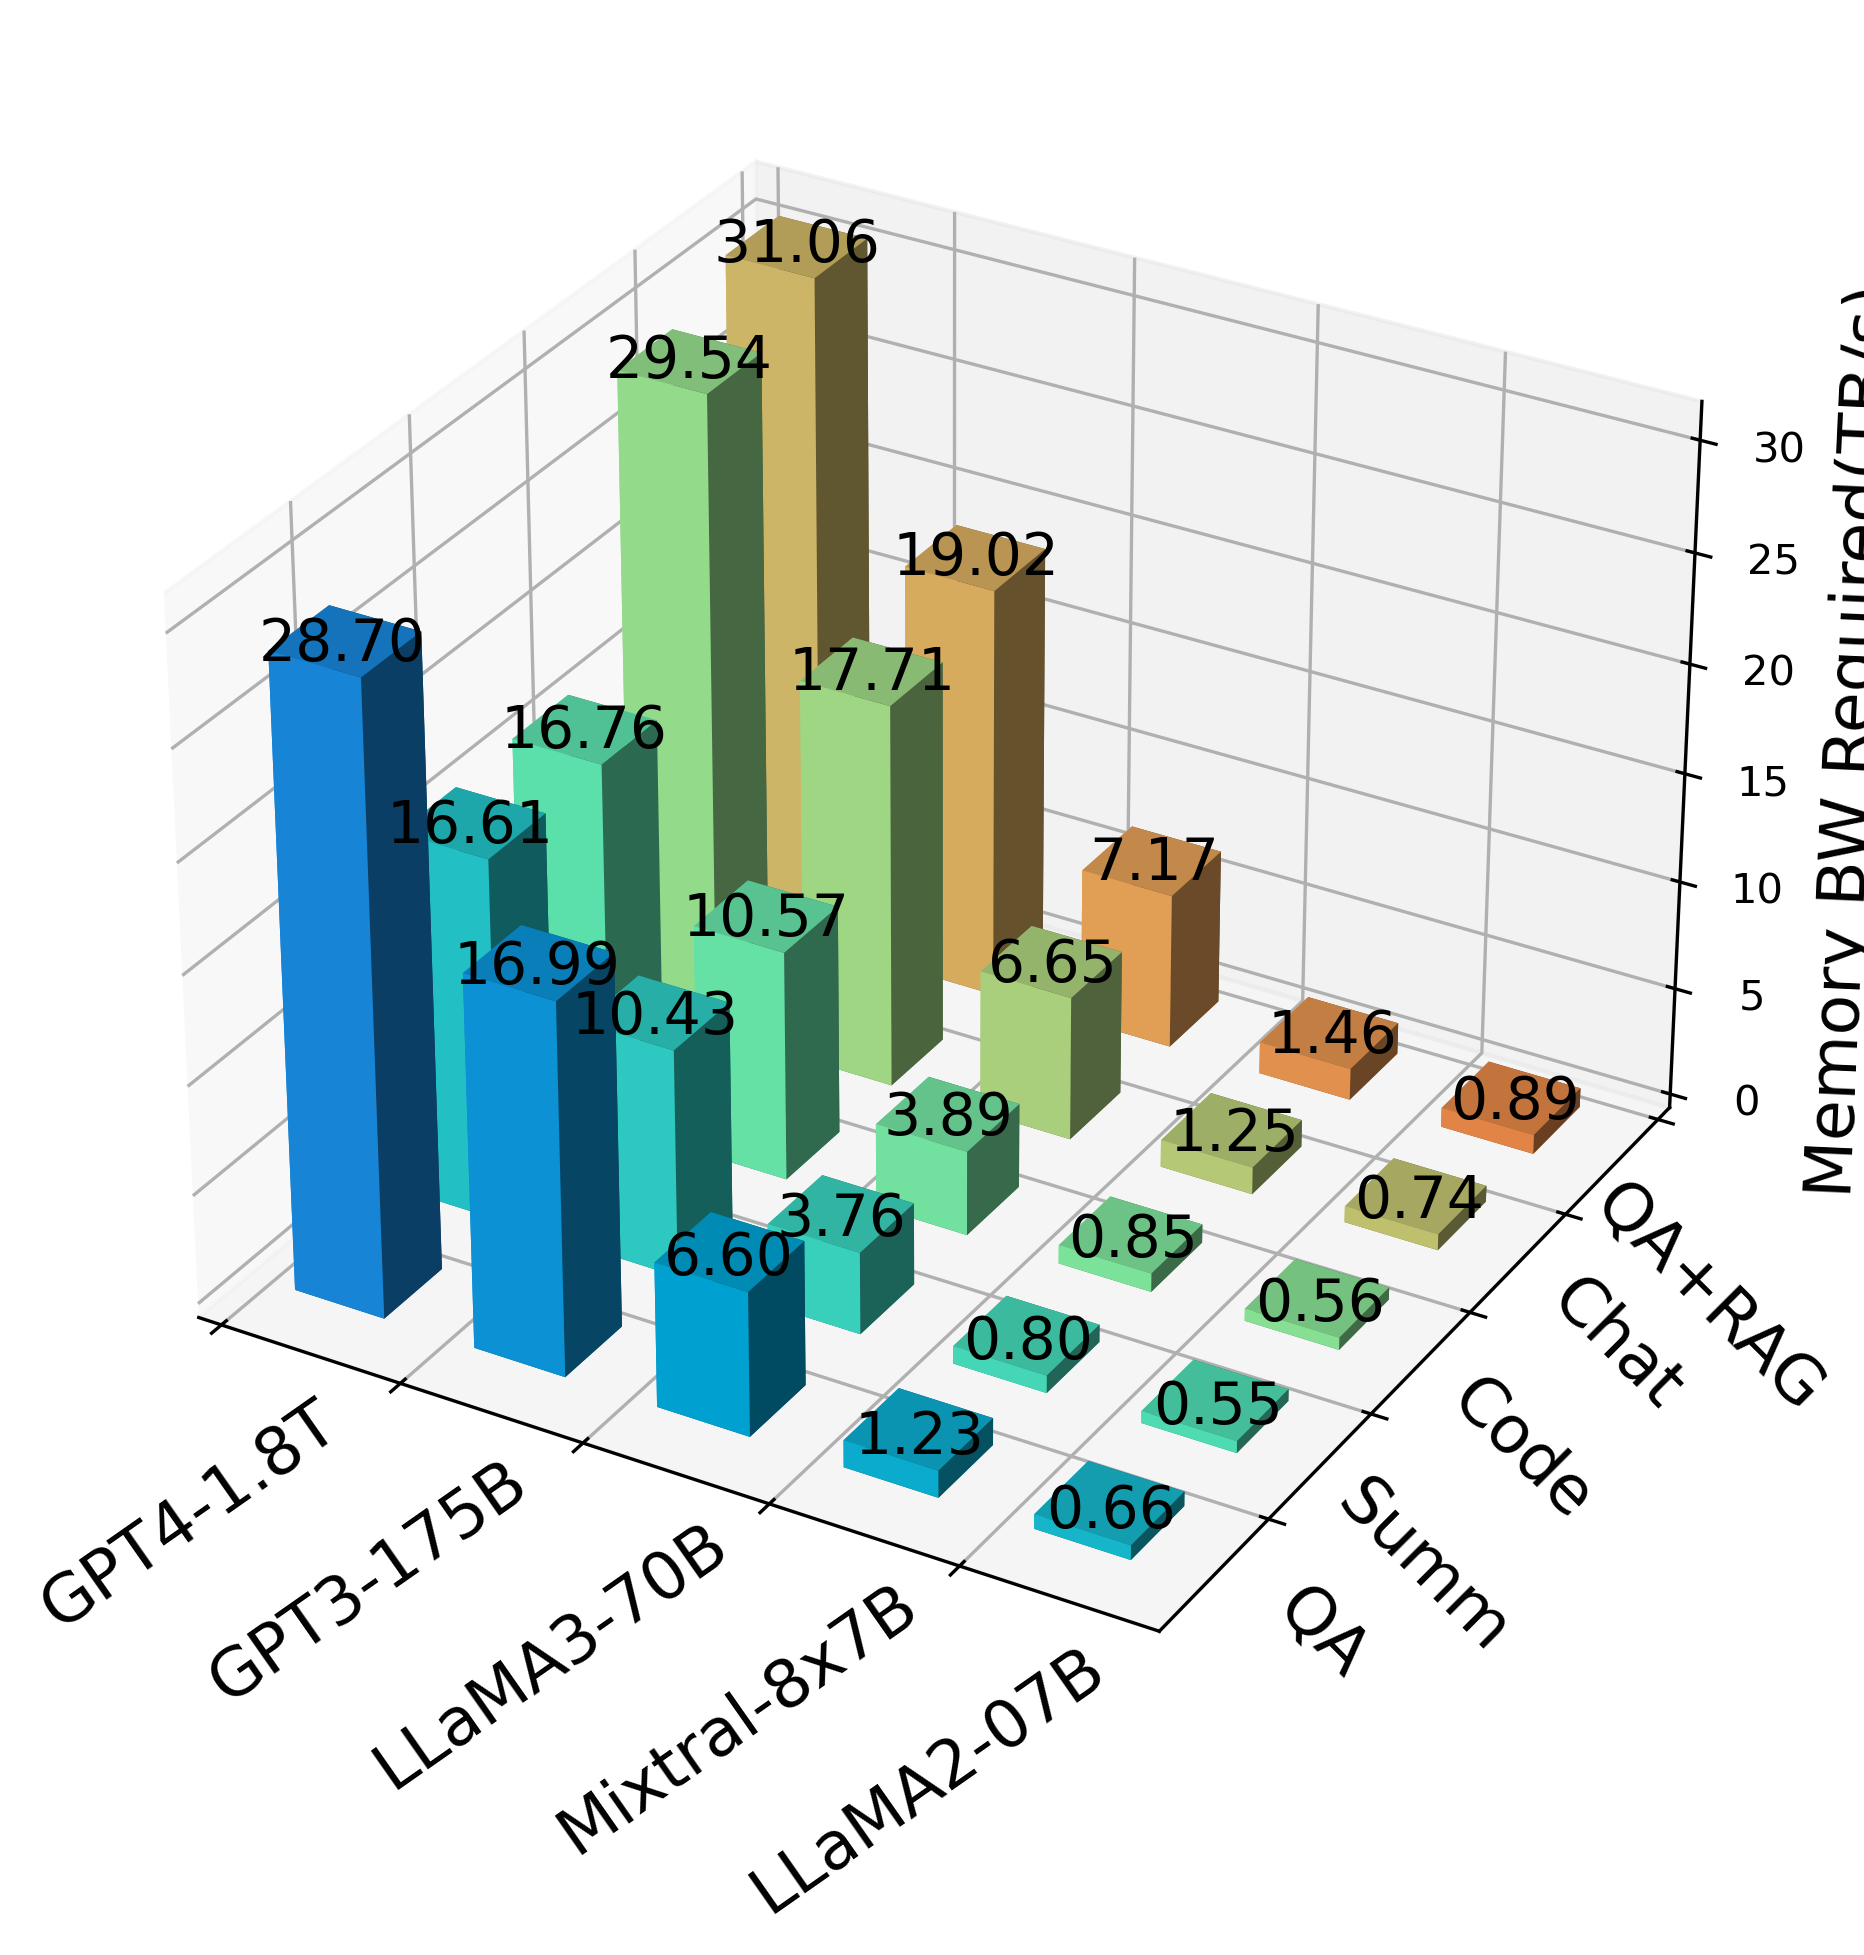

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result=df_sorted['Req Memory BW(TB/s)']

result = np.array(result, dtype=float)

fig=plt.figure(figsize=(8, 6), dpi=300)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(Model_names_for_3d_plot)
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['QA', 'Summ', 'Code', 'Chat', 'QA+RAG'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()
dx=0.5
dy=0.5
dz=zpos
ax1.xaxis.set_ticks(xpos - 0.2)
ax1.xaxis.set_ticklabels(xlabels, rotation=35, size=16)
# ax1.set_xlabel('X-axis', rotation=90)  # Adjust rotation here

ax1.yaxis.set_ticks(ypos + 0.7 )
ax1.yaxis.set_ticklabels(ylabels, rotation=-45, size=16)

ax1.set_zlabel('Memory BW Required(TB/s)', rotation=-45, size=16)
# ax1.view_init(elev=20, azim=30)  # Adjust the elevation and azimuth angles here

# ax1.yaxis.set_label_coords(-0.1, 0.5)
# ax1.zaxis.set_label('TFLOPS Required')
values = np.linspace(0.2, 0.8, xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
for i in range(len(xpos)):
    for j in range(len(xpos)):
        ax1.text(xposM[i][j]+0.4, yposM[i][j], dz[i*len(xpos)+j], '%0.2f' % dz[i*len(xpos)+j], color='black', ha='center', va='bottom', size=14)

plt.subplots_adjust(left=0, bottom=0.05, right=1, top=1, wspace=0, hspace=0)

plt.show()


## Memory Size

In [9]:
df['Total Memory Req (GB)'] = (df['Model Weights (MB)'] + df['KV Cache (MB)'])/1024
df_long = pd.melt(df[['Usecase', 'Model', 'Used Weights (MB)','Unused Weights (MB)', 'KV Cache (MB)']], id_vars=['Usecase','Model'], var_name="Memory")
df_long['value'] = df_long['value'] / 1024
df_long = df_long.replace(Model_list, Model_names_in_plot)

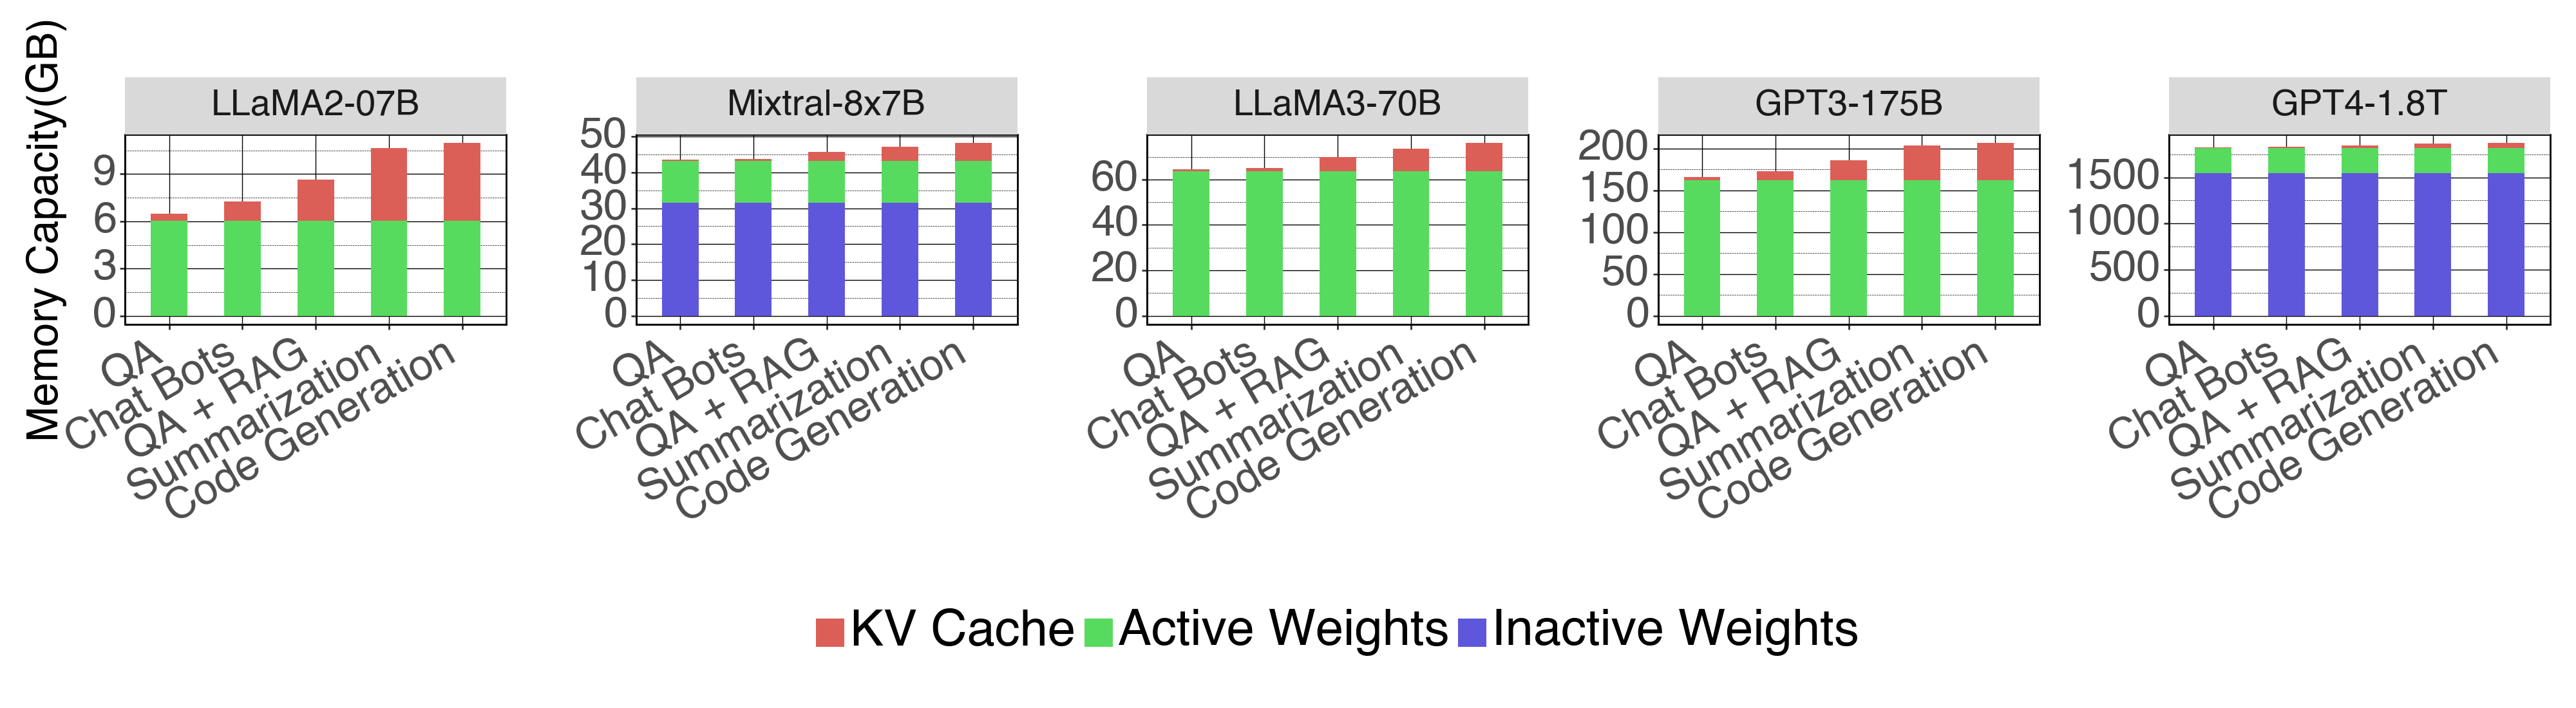

In [10]:
# Create the bar graph using plotnine
plot_df = df.replace(Model_list, Model_names_in_plot)
df_long = df_long.replace(['Used Weights (MB)','Unused Weights (MB)', 'KV Cache (MB)'], ['Active Weights','Inactive Weights', 'KV Cache'])
df_long['Usecase'] = pd.Categorical(df_long['Usecase'], categories=Decode_requirements.keys(), ordered=True)

df_long['Model'] = pd.Categorical(df_long['Model'], categories=Model_names_in_plot)
df_long['Memory'] = pd.Categorical(df_long['Memory'], categories=['KV Cache','Active Weights', 'Inactive Weights',])

plot = (
    ggplot(df_long, aes(x='Usecase', y='value', fill='Memory')) +
    geom_bar(stat='identity', position='stack', width=0.5) 
    + labs( y='Memory Capacity(GB)')
    + plot_theme
    + p9.theme(legend_position='bottom', strip_text=p9.element_text(size=20),)
    + p9.theme(axis_text_x=p9.element_text(rotation=30, hjust=1), axis_title_x=p9.element_blank())
    + p9.theme(figure_size=(20, 5.5),legend_text=p9.element_text(size=28),legend_title=p9.element_blank())
    + p9.facet_wrap("~ Model ", scales = 'free', ncol=5) 
    
)

    # Show the plot
print(plot)


## Compute FLOPS

In [11]:

data = []

for usecase in Prefill_requirements.keys():
    b,bb,in_tokens, out_tokens, time_prefill = Prefill_requirements[usecase]
    for model in Model_list:
        model_df, summary_table = prefill_moddeling(model = model, batch_size = b,
                                input_tokens = in_tokens, output_tokens = out_tokens, model_profilling=True,
                                tensor_parallel = 1, pipeline_parallel = 1, bits='int8',)
        single_layer_kv_size = 2*model_df[model_df['Op Type'].str.contains('Logit')]['Input_w (MB)'].values[0]
        num_layers = summary_table.loc[0,'KV Cache (MB)']/ single_layer_kv_size 
        Memory_BW_required = (summary_table.loc[0,'Total Data (MB)'] - 2*model_df[model_df['Op Type'].str.contains('Logit')]['Output (MB)'].values[0]*num_layers)/time_prefill / 1e6   ## TB/s
        Compute_FLOPS_required = (summary_table.loc[0,'MACs (MFLOP)'])/ time_prefill / 1e9   ## PFLOPS/s
        data.append([usecase,model,Memory_BW_required, Compute_FLOPS_required]+list(summary_table.values[0]))
df = pd.DataFrame(data, columns=(['Usecase', 'Model', 'Req Memory BW(TB/s)', 'Req FLOPs (PFLOP/s)']+list(summary_table.columns)) )


/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_prefill.py:105: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 43.25 GB, KV Cache:0.06103515625 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_prefill.py:105: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 63.75 GB, KV Cache:0.152587890625 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_prefill.py:105: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 162.0 GB, KV Cache:2.197265625 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inference/llm_prefill.py:105: UserWarning: All params would not fit on chip. System Memory Cap:40.0 GB , Weights : 1819.125 GB, KV Cache:2.5634765625 
/Users/abambhaniya3/Dropbox (GaTech)/Projects/GPT inference/Micro/GenZ/src/LLM_inferenc

In [12]:
Usecase_list_for_3d_plot = ['QA + RAG', 'Chat Bots', 'Code Generation', 'Summarization', 'QA'][::-1]
Model_names_for_3d_plot = Model_names_in_plot[::-1]
# Create the bar graph using plotnine
df['Model'] = df['Model'].astype(str)
plot_df = df.replace(Model_list,Model_names_in_plot)
# Convert Usecase and Model columns to categorical type with custom order
plot_df['Usecase'] = pd.Categorical(plot_df['Usecase'], categories=Usecase_list_for_3d_plot, ordered=True)
plot_df['Model'] = pd.Categorical(plot_df['Model'], categories=Model_names_for_3d_plot, ordered=True)
df_sorted = plot_df.sort_values(by=['Usecase', 'Model'])

display(df_sorted)

,Usecase,Model,Req Memory BW(TB/s),Req FLOPs (PFLOP/s),MACs (MFLOP),Total Data (MB),Model Weights (MB),KV Cache (MB),AR data (MB),Pipe data (MB)
4,QA,GPT4-1.8T,9.486186,2.987026,5.974052e+08,1.917745e+06,1862784.0,2625.00,2625.0,0.0
3,QA,GPT3-175B,0.941940,1.763055,3.526109e+08,2.059661e+05,165888.0,2250.00,2250.0,0.0
2,QA,LLaMA3-70B,0.388900,0.697618,1.395235e+08,8.754562e+04,65280.0,156.25,1250.0,0.0
1,QA,Mixtral-8x7B,0.239409,0.128786,2.575722e+07,4.983488e+04,44288.0,62.50,250.0,0.0
0,QA,LLaMA2-07B,0.044044,0.067381,1.347630e+07,1.076194e+04,6176.0,250.00,250.0,0.0
19,Summarization,GPT4-1.8T,1.189790,5.058567,1.011713e+10,6.993839e+06,1862784.0,39375.00,39375.0,0.0
18,Summarization,GPT3-175B,0.251694,3.140034,6.280068e+09,4.458466e+06,165888.0,33750.00,33750.0,0.0
17,Summarization,LLaMA3-70B,0.126390,1.321678,2.643355e+09,2.450046e+06,65280.0,2343.75,18750.0,0.0
16,Summarization,Mixtral-8x7B,0.049097,0.248229,4.964588e+08,5.376474e+05,44288.0,937.50,3750.0,0.0
15,Summarization,LLaMA2-07B,0.022834,0.156122,3.122450e+08,4.851213e+05,6176.0,3750.00,3750.0,0.0


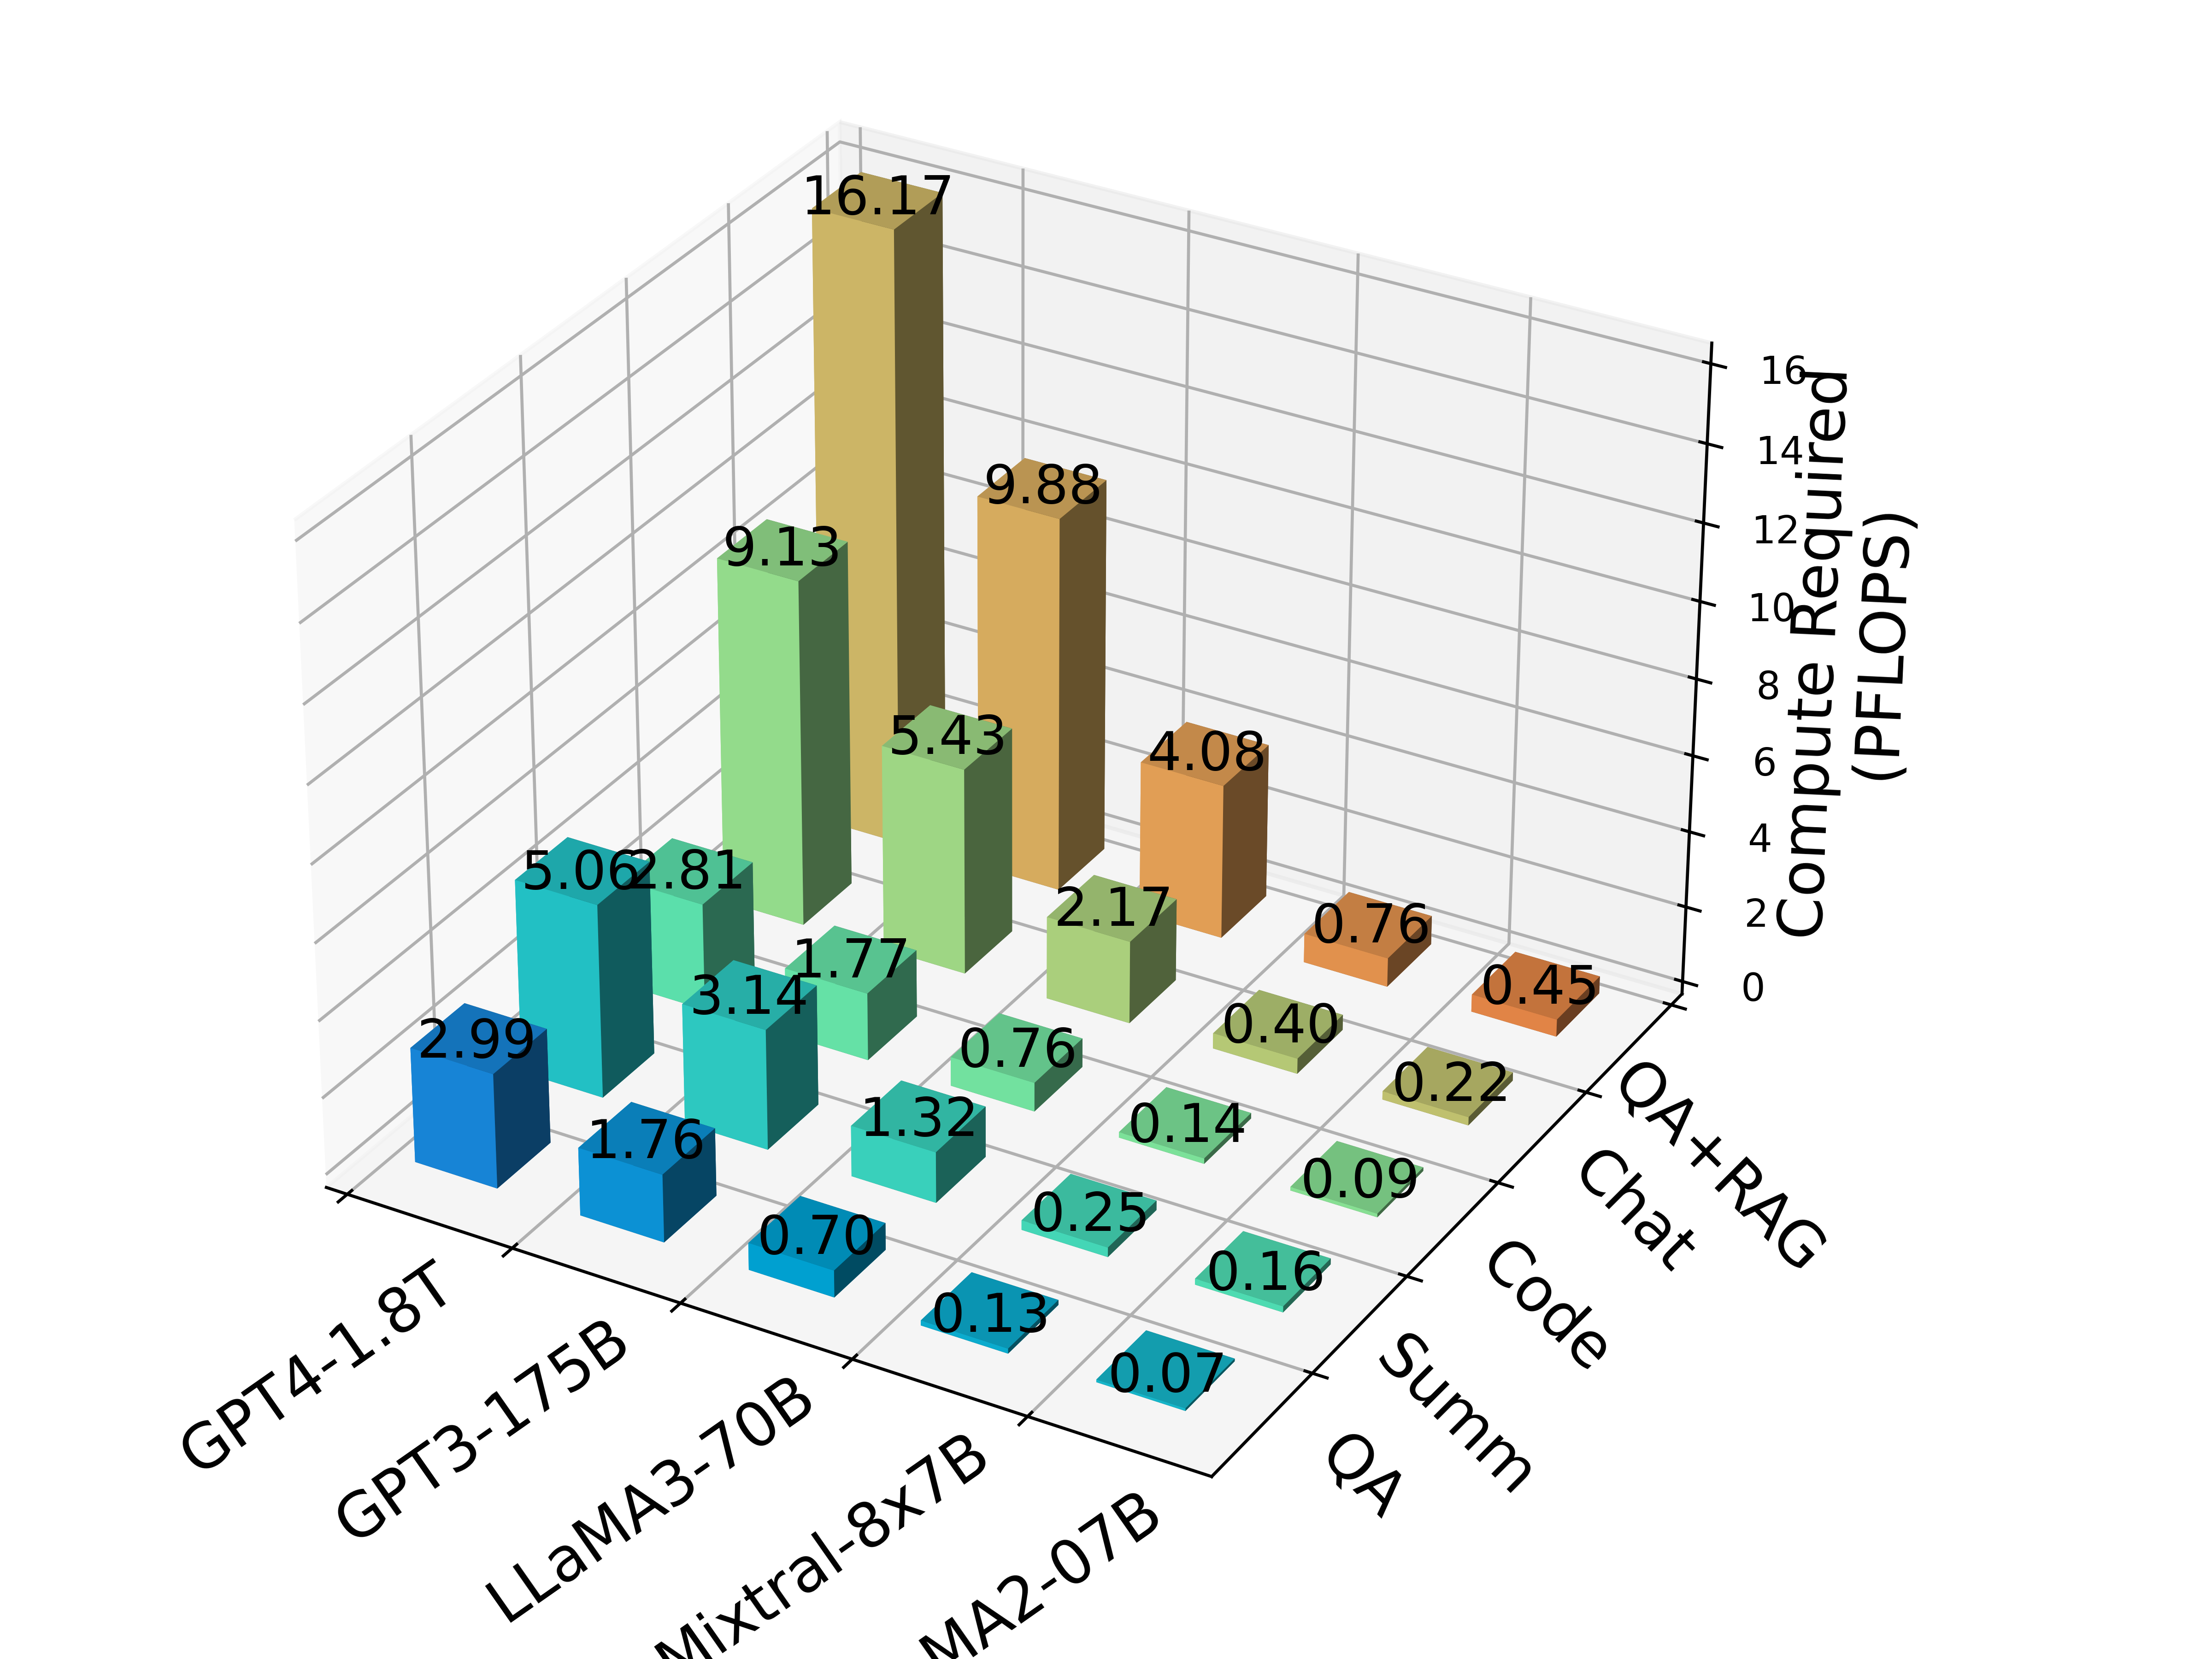

In [13]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result=df_sorted['Req FLOPs (PFLOP/s)']

result = np.array(result, dtype=float)

fig=plt.figure(figsize=(8, 6), dpi=300)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(Model_names_for_3d_plot)
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['QA', 'Summ', 'Code', 'Chat', 'QA+RAG'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()
dx=0.5
dy=0.5
dz=zpos
ax1.xaxis.set_ticks(xpos - 0.2)
ax1.xaxis.set_ticklabels(xlabels, rotation=35, size=16)
# ax1.set_xlabel('X-axis', rotation=90)  # Adjust rotation here

ax1.yaxis.set_ticks(ypos + 0.7 )
ax1.yaxis.set_ticklabels(ylabels, rotation=-45, size=16)




ax1.set_zlabel('Compute Required\n (PFLOPS)', rotation=-45, size=16)
values = np.linspace(0.2, 0.8, xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
for i in range(len(xpos)):
    for j in range(len(xpos)):
        ax1.text(xposM[i][j]+0.4, yposM[i][j], dz[i*len(xpos)+j], '%0.2f' % dz[i*len(xpos)+j], color='black', ha='center', va='bottom', size=14)
plt.subplots_adjust(left=0, bottom=0.05, right=0.9, top=1, wspace=0, hspace=0)



plt.show()
